In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

各字段含义：

- 评分（Points）：评分为1-100
- 品种（Variety）：用来制作葡萄酒的葡萄品种
- 描述（Description）：侍酒师的几句话描述酒的味道，气味，外观，感觉等。
- 国家（Country）：葡萄酒来自的国家
- 省（Province）：葡萄酒来自的省份或州
- 区域1（Region 1）：一个省或州的葡萄酒产区（即纳帕）
- 区域2（Region 2）：有时在葡萄酒产区内有更具体的区域，但是这个值有时可能是空白的
- 酒庄（Winery）：酿酒的酿酒厂
- 名称（Designation）：葡萄酒酿造厂所在的葡萄园
- 价格（Price）：一瓶葡萄酒的价格
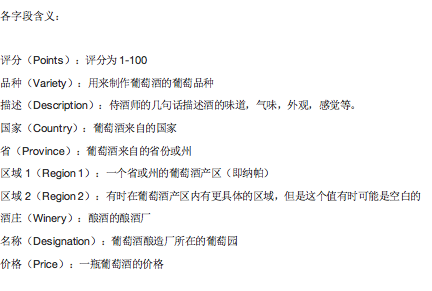

In [2]:
prefix='/pi/ai/kaggle/wine-reviews'
df=pd.read_csv(prefix+'/winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
del df['description']
del df['Unnamed: 0']
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
df.info()
# 发现评分和价格是数值型的，我们计算时候就不用转换类型了~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 9 columns):
country        150925 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


In [7]:
# 各字段的数据缺失情况
df.isnull().any()
# 本想把有缺失值的记录去掉，去掉后发现只有US的葡萄酒信息，所以没去除存在缺失值的记录

country         True
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

 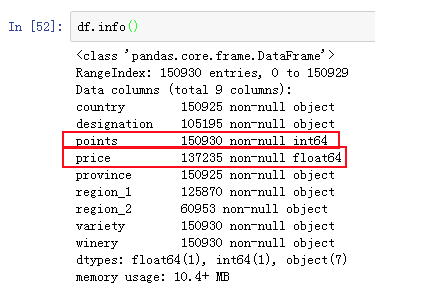

Populating the interactive namespace from numpy and matplotlib


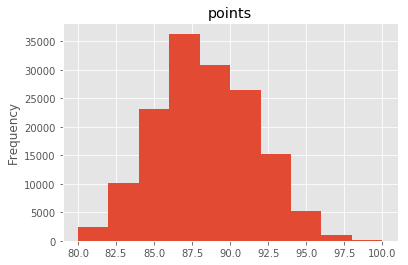

In [8]:
# 绘制直方图查看评分分布情况：
%pylab inline
df['points'].plot(kind='hist', title='points')
# 发现基本符合高斯分布情况，评分大多集中在85~90分

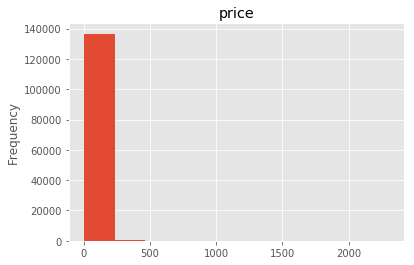

In [9]:
# 接着我们看看葡萄酒的价格情况：
df['price'].plot(kind='hist', title='price')
# 发现价格集中在图示的最左端，因为有特殊离群值的影响，所以区间给的特别宽

In [11]:
df[df['price']>900]
# 通过筛选发现确实是有特别昂贵的葡萄酒
#（这里暂且不管这个价格数据是采集异常还是真的这么贵）

,country,designation,points,price,province,region_1,region_2,variety,winery
10651,Austria,Ried Loibenberg Smaragd,94,1100.0,Wachau,NaN,NaN,Grüner Veltliner,Emmerich Knoll
10886,Portugal,Colheita White,94,980.0,Port,NaN,NaN,Port,Kopke
13318,US,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
26296,France,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
34920,France,NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
34927,France,NaN,97,1100.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion
34939,France,NaN,96,1300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Mouton Rothschild
34942,France,NaN,96,1200.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion
35531,France,NaN,94,1000.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château La Mission Haut-Brion


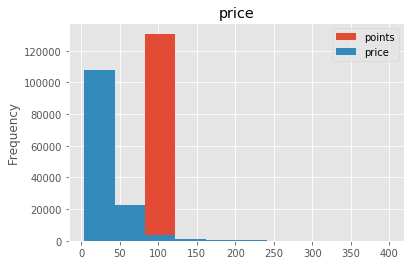

In [12]:
# 为了可视化到主要的部分，我们选中大部分的价格重新做可视化
df[df['price']<400].plot(kind='hist', title='price')
# 这样就可以看到，大部分的价格是在0-100（好像数据集提供者没告诉我价格的单位）

In [14]:
# 为了买到满意的葡萄酒，我们看看葡萄酒的性价比
# 简单定义为 性价比 = 评分/价格
df['cost performance']=df['points']/df['price']
df.sort_values(['cost performance'], ascending=False).head(10)
# 结果发现计算出的价格低的明显性价比高

,country,designation,points,price,province,region_1,region_2,variety,winery,cost performance
25645,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
99045,Portugal,Toutalga,86,4.0,Alentejano,NaN,NaN,Portuguese Red,Herdade dos Machados,21.50
48655,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
126595,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
80185,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
73417,Romania,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas,21.50
90546,Argentina,NaN,85,4.0,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte,21.25
119295,US,NaN,84,4.0,California,California,California Other,Merlot,Bandit,21.00
91766,Argentina,Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass,21.00
34415,Spain,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal,21.00


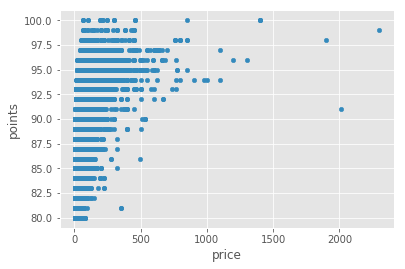

In [15]:
# 我们看看总体上葡萄酒价格和评分的关系：
df.plot(kind='scatter', x='price', y='points')
# 发现评分相同的葡萄酒，价格还是差异挺大，特别是评分较高的葡萄酒价格的差异
# 从图中也可以看出，有几个离群值，他们大多价格很高！

In [16]:
# 葡萄酒基本来自哪些国家
df['country'].value_counts().head()
# 我们看到，生产葡萄酒的五个大国是吗，美国、意大利、发过、西班牙、智利共和国。

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

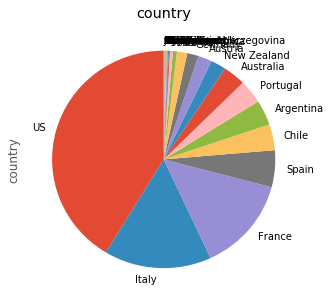

In [18]:
# 为了更直观凸显他们的比例，我们绘制饼图：
df['country'].value_counts().plot(kind='pie', figsize=[5,5],
                                 counterclock=True,
                                 startangle=90,
                                 legend=False, 
                                 title='country')
# 发现美国真是占据了葡萄酒的半壁江山啊

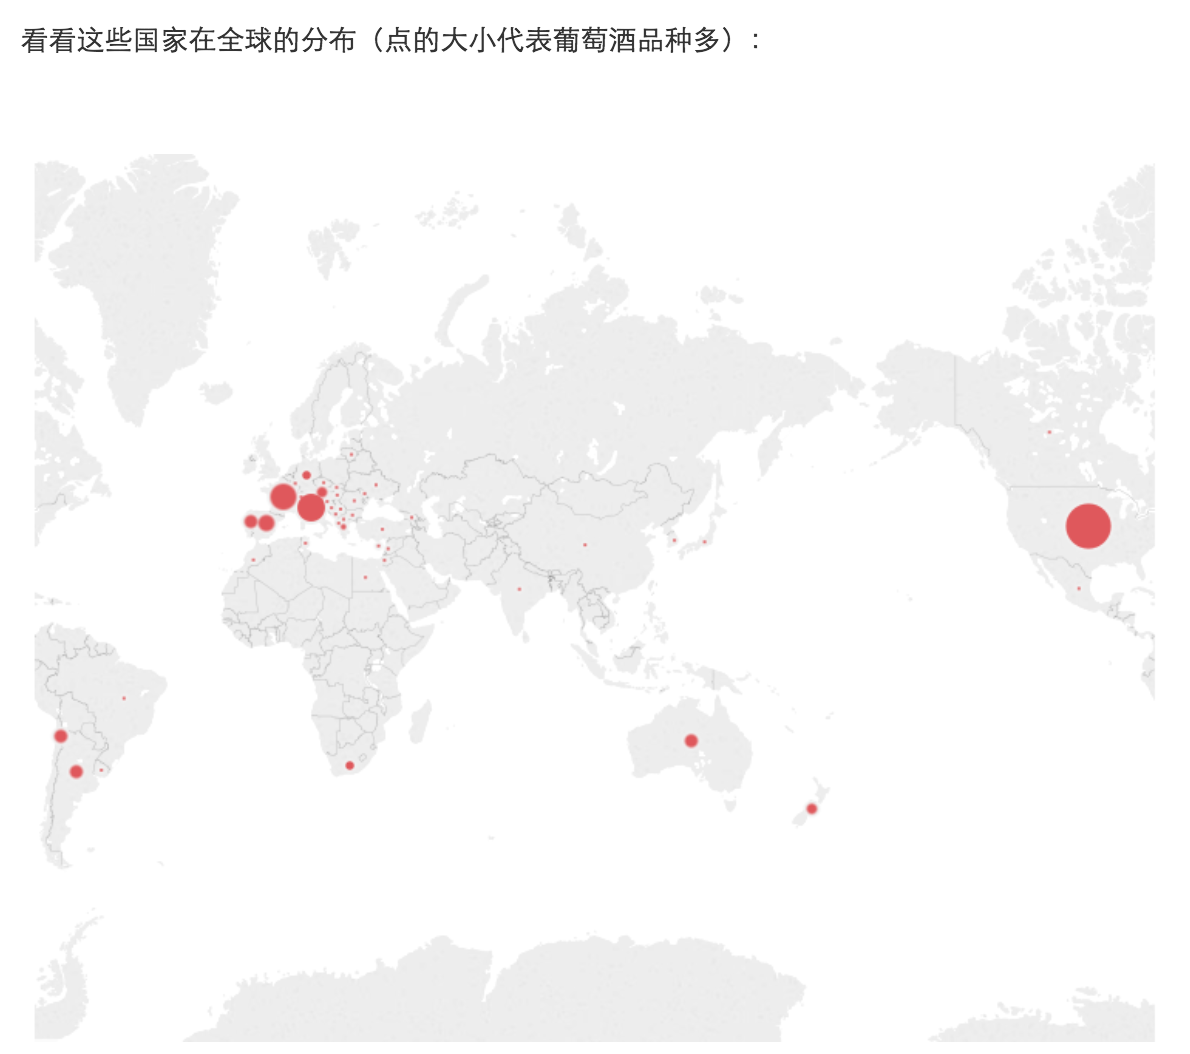

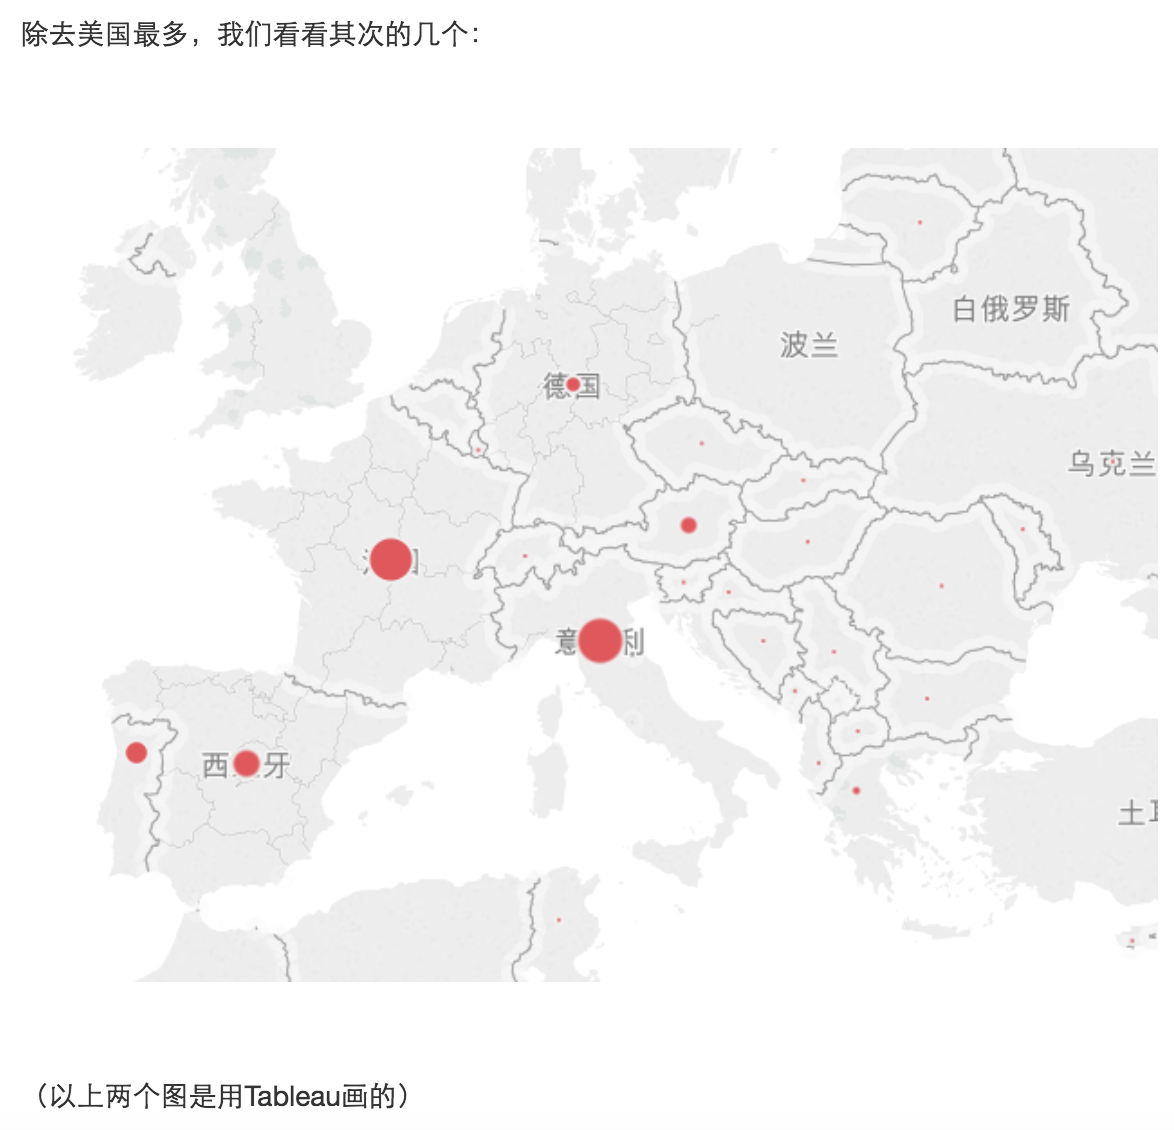

In [19]:
# 酿造葡萄酒的葡萄品种
df['variety'].value_counts().head()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

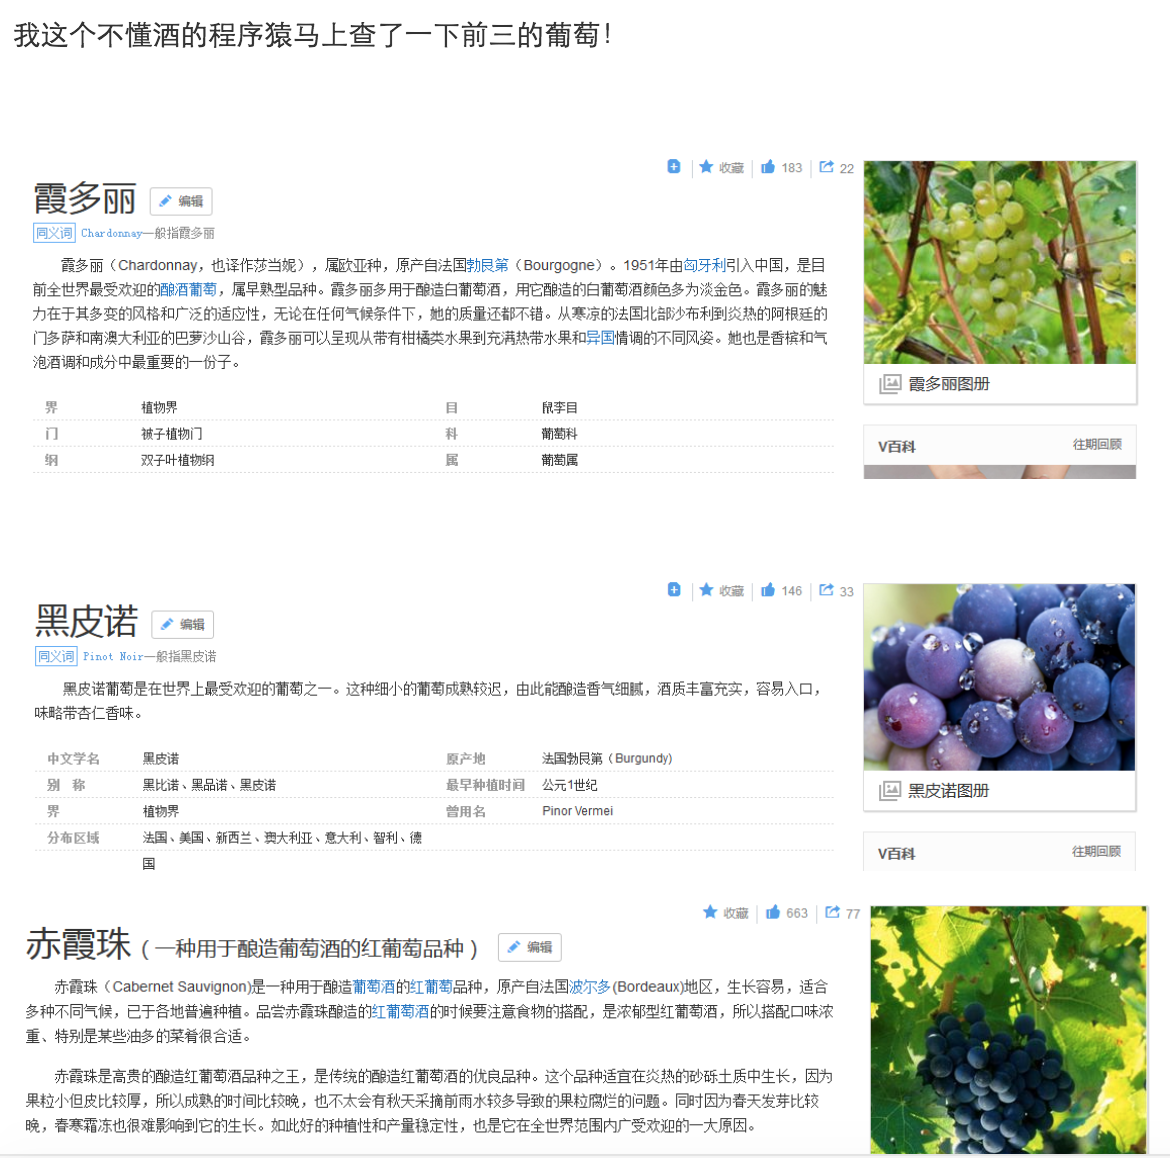

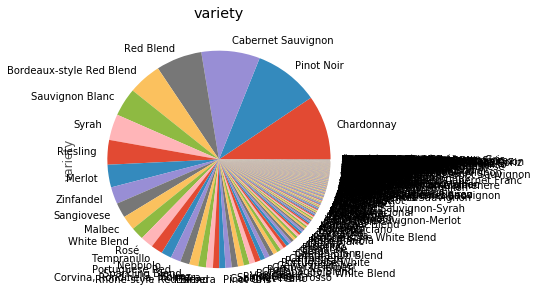

In [21]:
# 为了看一下这些葡萄使用的比重，做个饼图：
df['variety'].value_counts().plot(kind='pie',
                                 figsize=[5,5],
                                 counterclock=True,
                                 startangle=0,
                                 legend=False,
                                 title='variety')
# 发现前三种占据了1/4
# 后面还有使用较少的名称堆叠在了一起

In [23]:
# 我们接下来看看酒庄信息：
# 前五的葡萄酒品种最多
df['winery'].value_counts().head()

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
Name: winery, dtype: int64

In [25]:
# 看看哪个酒庄的葡萄酒均价最高：
winery_price=df['price'].groupby(df['winery']).mean()
win_ord=winery_price.sort_values(ascending=False).head()
win_ord

winery
Blair                            1029.000000
Château Latour                    794.400000
Masseto                           587.500000
Château Haut-Brion                569.090909
Château La Mission Haut-Brion     568.166667
Name: price, dtype: float64

1.巴布莱尔酒庄

苏格兰最古老的酒庄之一，巴布莱尔酒庄是全球唯一专注生产单一年份威士忌（Single Vintage Whisky）的酒庄。

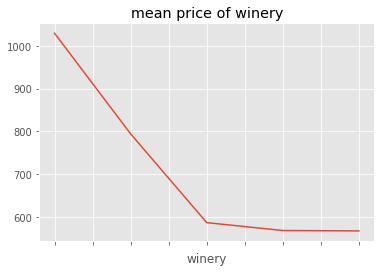

In [27]:
# 这五个酒庄的葡萄酒平均价格变化趋势：
win_ord.plot(kind='line', title='mean price of winery')
# 前两个的价格遥遥领先~